Import Library and Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
from scipy.stats import t
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

Read file excel and display data for Example

In [ ]:
# Load the data
df = pd.read_excel('/content/Adidas-US-Sales-Datasets.xlsx')

# Drop the unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Select relevant columns
df_use = df[['Price per Unit','Units Sold','Product','Region','State']]

df_use=df_use.loc[(df_use['Product'] == "Men's Street Footwear") & (df_use['State']=='Florida')]

print(df_use.info())
print(df_use.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 722 to 8493
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price per Unit  60 non-null     float64
 1   Units Sold      60 non-null     int64  
 2   Product         60 non-null     object 
 3   Region          60 non-null     object 
 4   State           60 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ KB
None
       Price per Unit   Units Sold
count       60.000000    60.000000
mean        54.916667   478.866667
std         13.721555   346.777097
min         30.000000   100.000000
25%         45.000000   221.250000
50%         55.000000   293.500000
75%         61.250000   831.250000
max         95.000000  1150.000000


In [ ]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


**Display**


In [ ]:
display(df_use)

,Price per Unit,Units Sold,Product,Region,State
722,45.0,1100,Men's Street Footwear,Southeast,Florida
728,45.0,1070,Men's Street Footwear,Southeast,Florida
734,45.0,1025,Men's Street Footwear,Southeast,Florida
740,55.0,1070,Men's Street Footwear,Southeast,Florida
746,60.0,1075,Men's Street Footwear,Southeast,Florida
752,65.0,1150,Men's Street Footwear,Southeast,Florida
758,65.0,1125,Men's Street Footwear,Southeast,Florida
764,55.0,1050,Men's Street Footwear,Southeast,Florida
770,60.0,1000,Men's Street Footwear,Southeast,Florida
776,60.0,975,Men's Street Footwear,Southeast,Florida


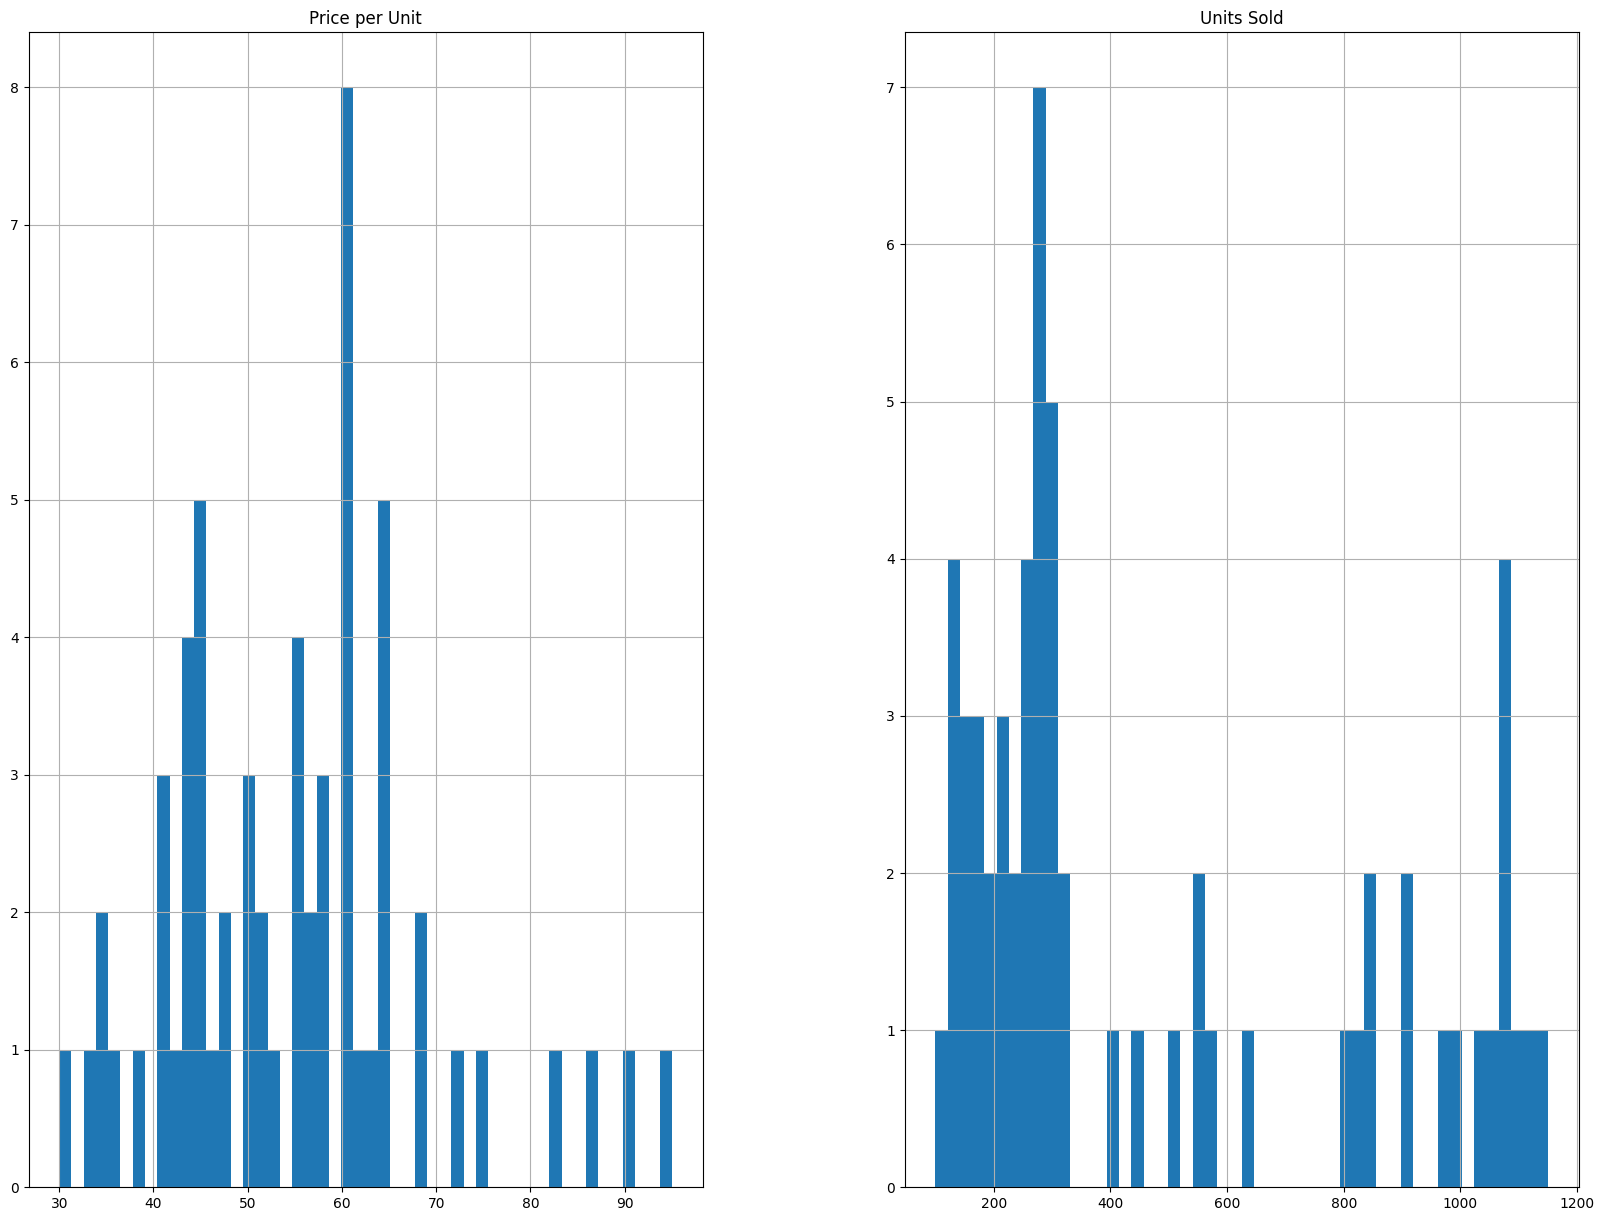

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_use.hist(bins=50, figsize=(20,15))
plt.show()

I.Linear Regression

Scatter diagram

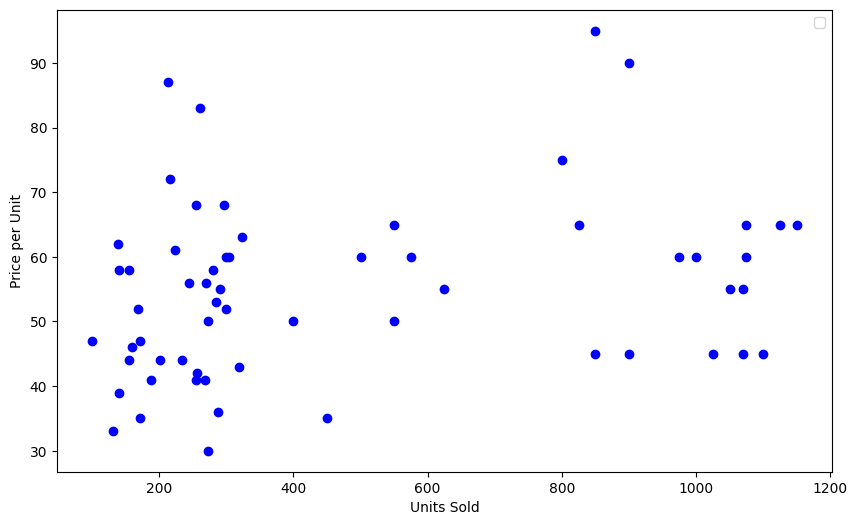

In [ ]:
X = df_use['Units Sold']
y = df_use['Price per Unit']
X = pd.Series(X)  # Flatten to convert to 1D Series

# Reshape X to be a 2D array (required by scikit-learn)
X = np.array(X).reshape(-1, 1)
y = pd.Series(y)  # Flatten to convert to 1D Series

# Reshape X to be a 2D array (required by scikit-learn)
y = np.array(y).reshape(-1, 1)
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(X, y, color='blue')
plt.ylabel('Price per Unit')
plt.xlabel('Units Sold')
plt.legend()

Least-Square Regression Line





Slope: 0.01
Intercept: 50.04


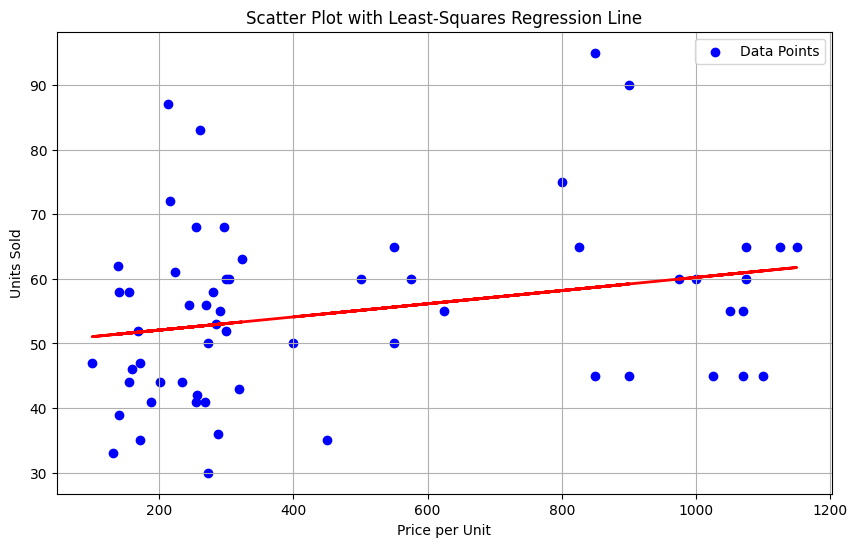

In [ ]:
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.title('Scatter Plot with Least-Squares Regression Line')
plt.legend()
plt.grid(True)
plt.show()


Residual Plot

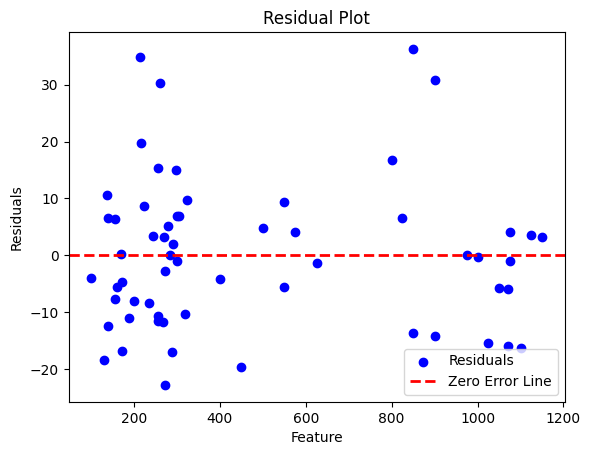

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# Labels and title
plt.xlabel('Feature')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

Outlier Dealing

Outliers detected: 2
Outlier indices: [17 41]


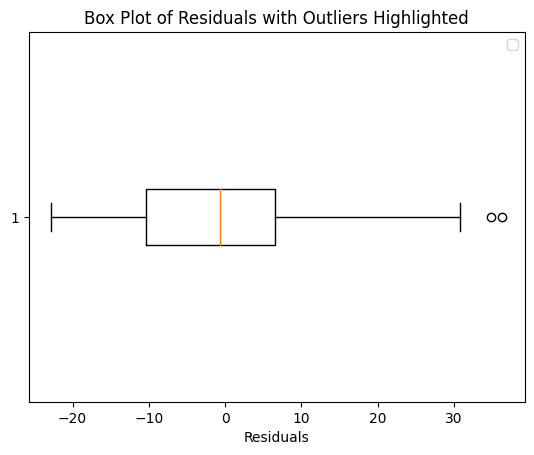

<Figure size 1000x600 with 0 Axes>

In [ ]:
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (residuals < lower_bound) | (residuals > upper_bound)
print(f"Outliers detected: {np.sum(outliers)}")
print(f"Outlier indices: {np.where(outliers)[0]}")
plt.boxplot(residuals, vert=False)
plt.xlabel('Residuals')
plt.title('Box Plot of Residuals with Outliers Highlighted')
plt.legend()
plt.figure(figsize=(10, 6))
plt.show()

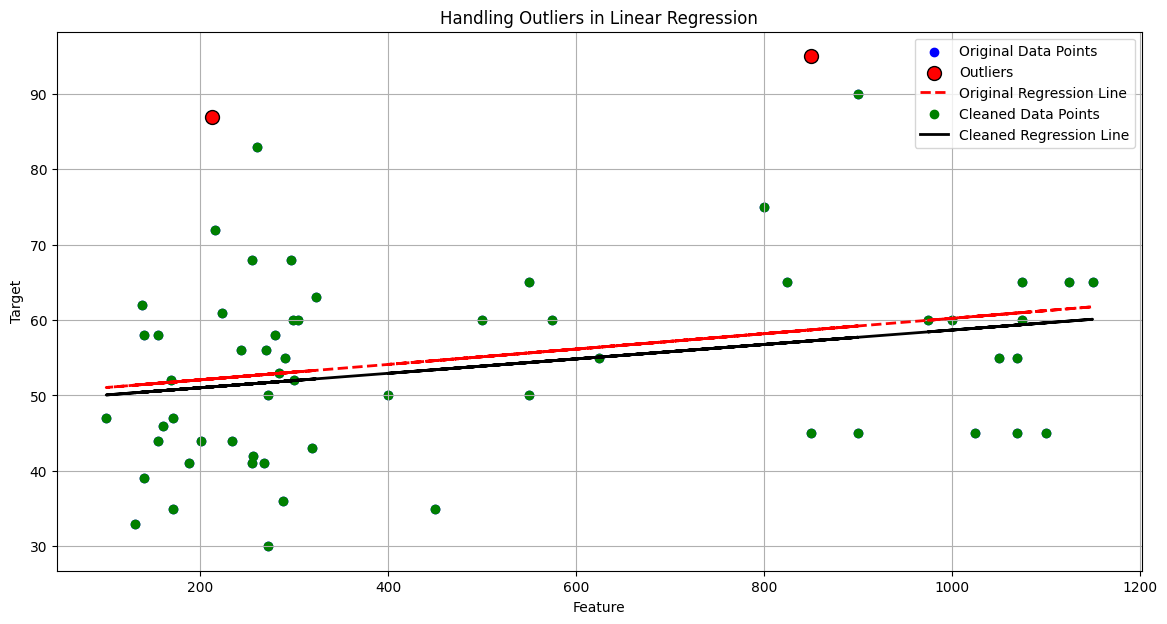

Original Slope: 0.01, Original Intercept: 50.04
Cleaned Slope: 0.01, Cleaned Intercept: 49.11


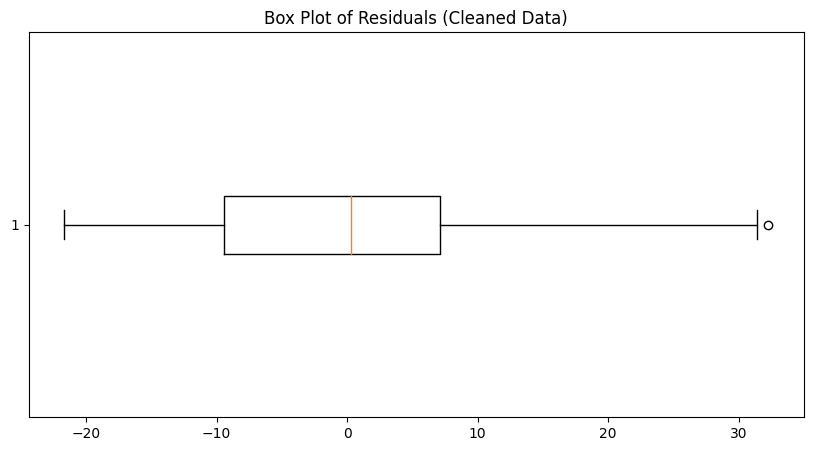

In [ ]:
# Remove outliers
X_cleaned = X[~outliers.flatten()]
y_cleaned = y[~outliers.flatten()]

# Reshape cleaned data

# Step 5: Re-fit Linear Regression Model on Cleaned Data
model_cleaned = LinearRegression()
model_cleaned.fit(X_cleaned, y_cleaned)
y_cleaned_pred = model_cleaned.predict(X_cleaned)

# Plot the original data, cleaned data, and regression lines
plt.figure(figsize=(14, 7))

# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Original Data Points')

# Highlight the outliers
plt.scatter(X[outliers], y[outliers], color='red', edgecolor='k', s=100, label='Outliers')

# Plot the original regression line
plt.plot(X, y_pred, color='red', linewidth=2, linestyle='--', label='Original Regression Line')

# Scatter plot of the cleaned data points
plt.scatter(X_cleaned, y_cleaned, color='green', label='Cleaned Data Points')

# Plot the cleaned regression line
plt.plot(X_cleaned, y_cleaned_pred, color='black', linewidth=2, label='Cleaned Regression Line')

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Handling Outliers in Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the slopes and intercepts of both models
original_slope = model.coef_[0][0]
original_intercept = model.intercept_[0]
cleaned_slope = model_cleaned.coef_[0][0]
cleaned_intercept = model_cleaned.intercept_[0]
print(f"Original Slope: {original_slope:.2f}, Original Intercept: {original_intercept:.2f}")
print(f"Cleaned Slope: {cleaned_slope:.2f}, Cleaned Intercept: {cleaned_intercept:.2f}")

# Plot boxplot of residuals for the cleaned data
cleaned_residuals = y_cleaned - y_cleaned_pred
plt.figure(figsize=(10, 5))
plt.boxplot(cleaned_residuals, vert=False)
plt.title('Box Plot of Residuals (Cleaned Data)')
plt.show()

In [ ]:
X_cleaned = sm.add_constant(X_cleaned)
model = sm.OLS(y_cleaned, X_cleaned)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.548
Date:                Thu, 20 Jun 2024   Prob (F-statistic):             0.0374
Time:                        02:11:36   Log-Likelihood:                -224.27
No. Observations:                  58   AIC:                             452.5
Df Residuals:                      56   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1108      2.639     18.612      0.0

II Descriptive Statistics

In [ ]:
df_use['Price per Unit'].describe()

count    60.000000
mean     54.916667
std      13.721555
min      30.000000
25%      45.000000
50%      55.000000
75%      61.250000
max      95.000000
Name: Price per Unit, dtype: float64

In [ ]:
df_use['Units Sold'].describe()

count      60.000000
mean      478.866667
std       346.777097
min       100.000000
25%       221.250000
50%       293.500000
75%       831.250000
max      1150.000000
Name: Units Sold, dtype: float64

III Normality

Price per unit

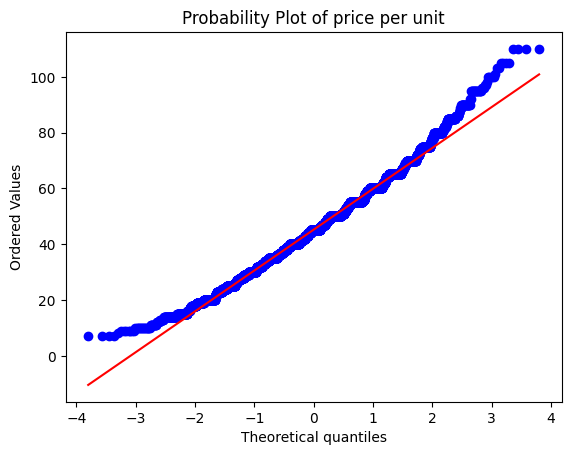

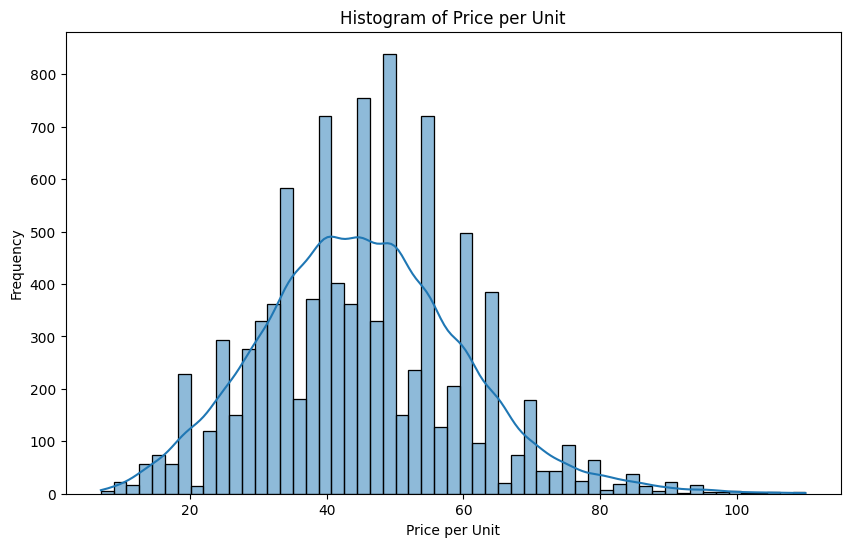

In [ ]:
# Draw probability plot
stats.probplot(df['Price per Unit'], dist="norm", plot=plt)
plt.title('Probability Plot of price per unit')
plt.show()

# Draw histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], kde=True)
plt.title('Histogram of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()


Transform data to normal distribution

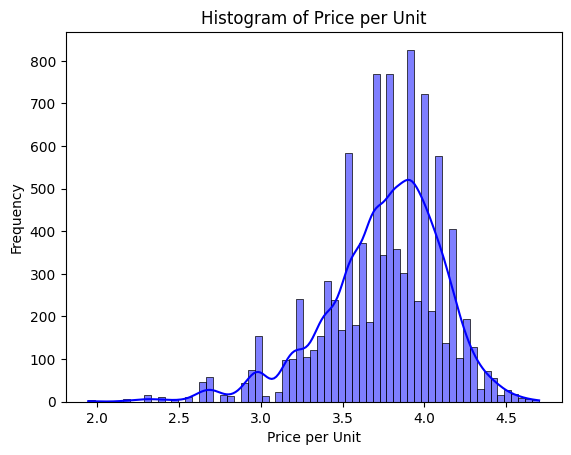

In [ ]:
# Using Log
transformd_data = np.log(df['Price per Unit'])
sns.histplot(transformd_data, kde = True, color = 'blue')
plt.title('Histogram of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

Units Sold

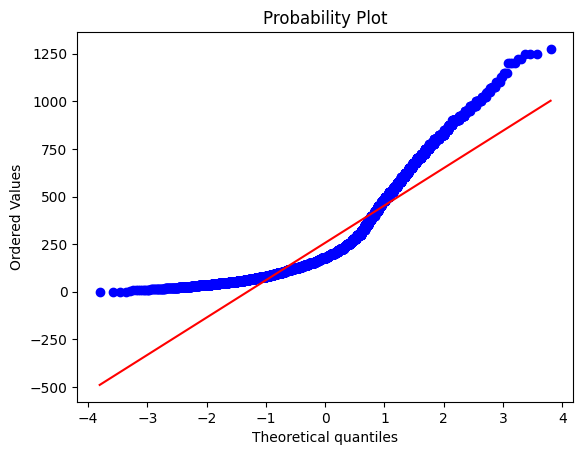

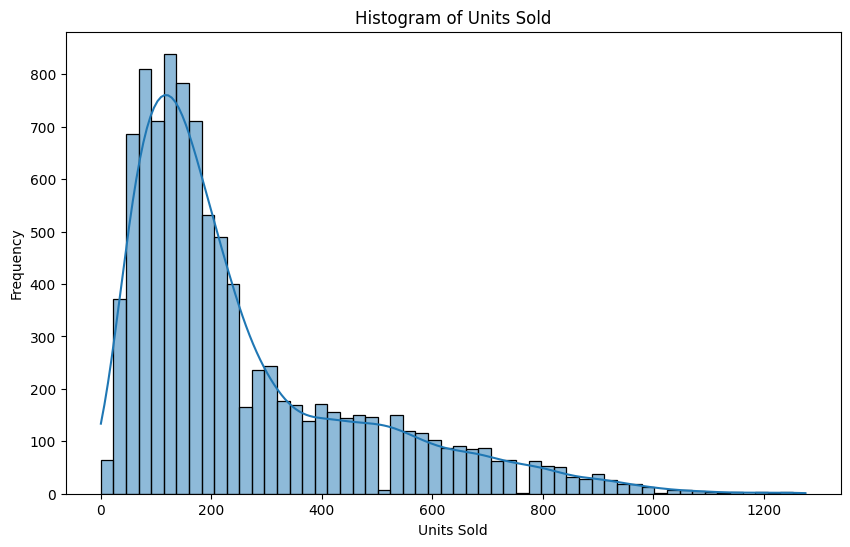

In [ ]:
# Draw probability plot
stats.probplot(df['Units Sold'], dist="norm", plot=plt)
plt.title('Probability Plot')
plt.show()

# Draw histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], kde=True)
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

Transform data to normal distribution

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


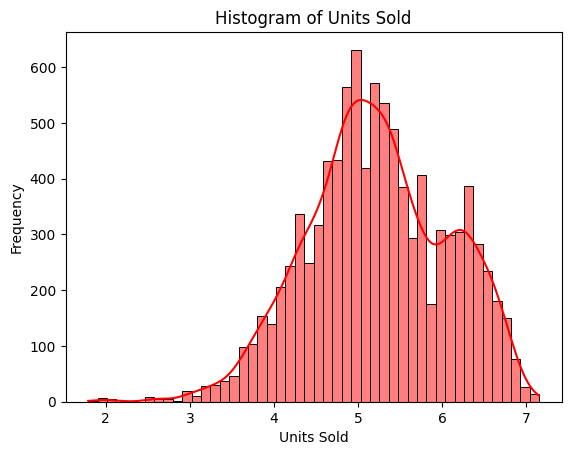

In [ ]:
# Using Log
transformd_data2 = np.log(df['Units Sold'])
sns.histplot(transformd_data2, kde = True, color = 'red')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

III Confidence Interval

In [ ]:
#Construct confidence Interval
def confidence_interval(data, confidence=0.95):
  # Convert data to a numpy arr
  data = np.array(data)

  #Calculate Sample mean and SD error
  mean = np.mean(data)
  std_error = stats.sem(data)

  #Get the critical value based on the sample size:
  n = len(data)
  if n>30:
    critical_value = stats.norm.ppf((1 + confidence) / 2)
  else:
    critical_value = stats.t.ppf((1 + confidence) / 2, n - 1)

  #Calculate the margin of error
  margin_of_error = critical_value * std_error

  #Calculate the confidence interval
  lower_bound = mean - margin_of_error
  upper_bound = mean + margin_of_error

  return lower_bound, upper_bound


In [ ]:
data_Price = df_use['Price per Unit']

#calculate the confidence interval
confidence_lvl_1 = 0.90
confidence_lvl_2 = 0.95
confidence_lvl_3 = 0.99

ci_1 = confidence_interval(data_Price, confidence_lvl_1)
ci_2 = confidence_interval(data_Price, confidence_lvl_2)
ci_3 = confidence_interval(data_Price, confidence_lvl_3)
print(f"The {int (confidence_lvl_1 * 100)}% Confidence Interval is: {ci_1}")
print(f"The {int (confidence_lvl_2 * 100)}% Confidence Interval is: {ci_2}")
print(f"The {int (confidence_lvl_3 * 100)}% Confidence Interval is: {ci_3}")

The 90% Confidence Interval is: (52.00289870006177, 57.83043463327156)
The 95% Confidence Interval is: (51.444697987948125, 58.388635345385204)
The 99% Confidence Interval is: (50.3537263605233, 59.47960697281003)


We are 95% confident that the Price per unit of the Men Street Footwear is between (confidence interval).This means that if we were to repeat the sampling process many times and calculate the 95% confidence interval for each sample, then 95% of these confidence intervals would contain the true average price for the product.

IV Hypothesis testing

Test whether or not there is a linear association between Units Sold
and Price per Unit (whether or not Slope = 0). Two alternatives are:

$H_0 : Slope = 0$

$H_a : Slope \neq 0$

The formal test statistic is $t_0$: $t_0 = \frac{Slope}{s\{Slope\}}$

Where: $s\{Slope\} = \frac{MSE}{∑(X_i - X̄)^2}$

With the level of significance at $α = 0.05$,

If $|t_0| ≤ t(1 - α/2; n - 2)$, conclude $H_0$

If $|t_0| > t(1 - α/2; n - 2)$, conclude $H_a$



In [ ]:
# Calculate SSE, MSE and s_slope
SSE = np.sum(residuals ** 2)
MSE = SSE / (len(X) - 2)
s_slope = np.sqrt(MSE / np.sum((X_cleaned - np.mean(X_cleaned)) ** 2))

# Print result
print(f"SSE = {SSE}")
print(f"MSE = {MSE}")
print(f"s_slope = {s_slope}")

SSE = 10371.290397244997
MSE = 178.81535167663787
s_slope = 0.003645051773458634


In [ ]:
# Calculate the t_0
t_0 = cleaned_slope / s_slope

# Calculate the critical t_value
alpha = 0.05
critical_t_value = stats.t.ppf(1 - alpha / 2, len(X_cleaned) - 2)

print(f"t_0 = {t_0}")
print(f"Critical t_value = {critical_t_value}")

# Determine if we reject the null hypothesis
if abs(t_0) > critical_t_value:
  print("Reject the null hypothesis. conclude H_a.")
else:
  print("Fail to reject the null hypothesis. conclude H_0.")

t_0 = 2.623334682980987
Critical t_value = 2.0032407174966975
Reject the null hypothesis. conclude H_a.


Hence, there is a linear association between Units Sold
and Price per Unit (Slope $\neq$ 0)